In [71]:
#requrements libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [97]:
##to read csv    


df= pd.read_csv("1.csv")



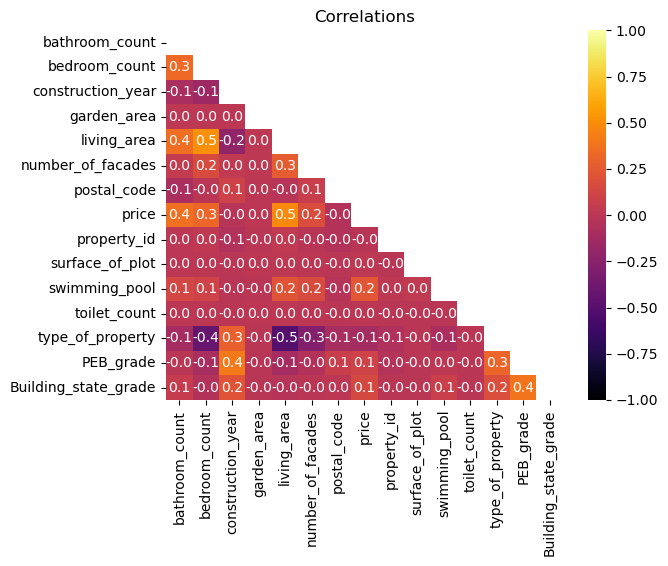

In [94]:
del df['garden']
del df['terrace']

df = df.select_dtypes(include=['float64', 'int'])
corr_matrix = df.corr()
corr_matrix_np = corr_matrix.values
np.fill_diagonal(corr_matrix_np, 1)
corr_matrix = pd.DataFrame(corr_matrix_np, index=corr_matrix.index, columns=corr_matrix.columns)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="inferno", vmax=1, vmin=-1, fmt='.1f')
plt.title("Correlations")
plt.show()

In [98]:
mean_of_all_price = df.groupby(['district']).mean(int)['price'].sort_values(ascending=False)

mean_of_all_sqm = df.groupby(['district']).mean(int)['living_area'].sort_values()


pricesqm = mean_of_all_price / mean_of_all_sqm 

pricesqm.head()
pricesqm.tail()



district
Turnhout    2347.934377
Verviers    1991.053939
Veurne      3705.880931
Virton      1972.977111
Waremme     1955.955393
dtype: float64

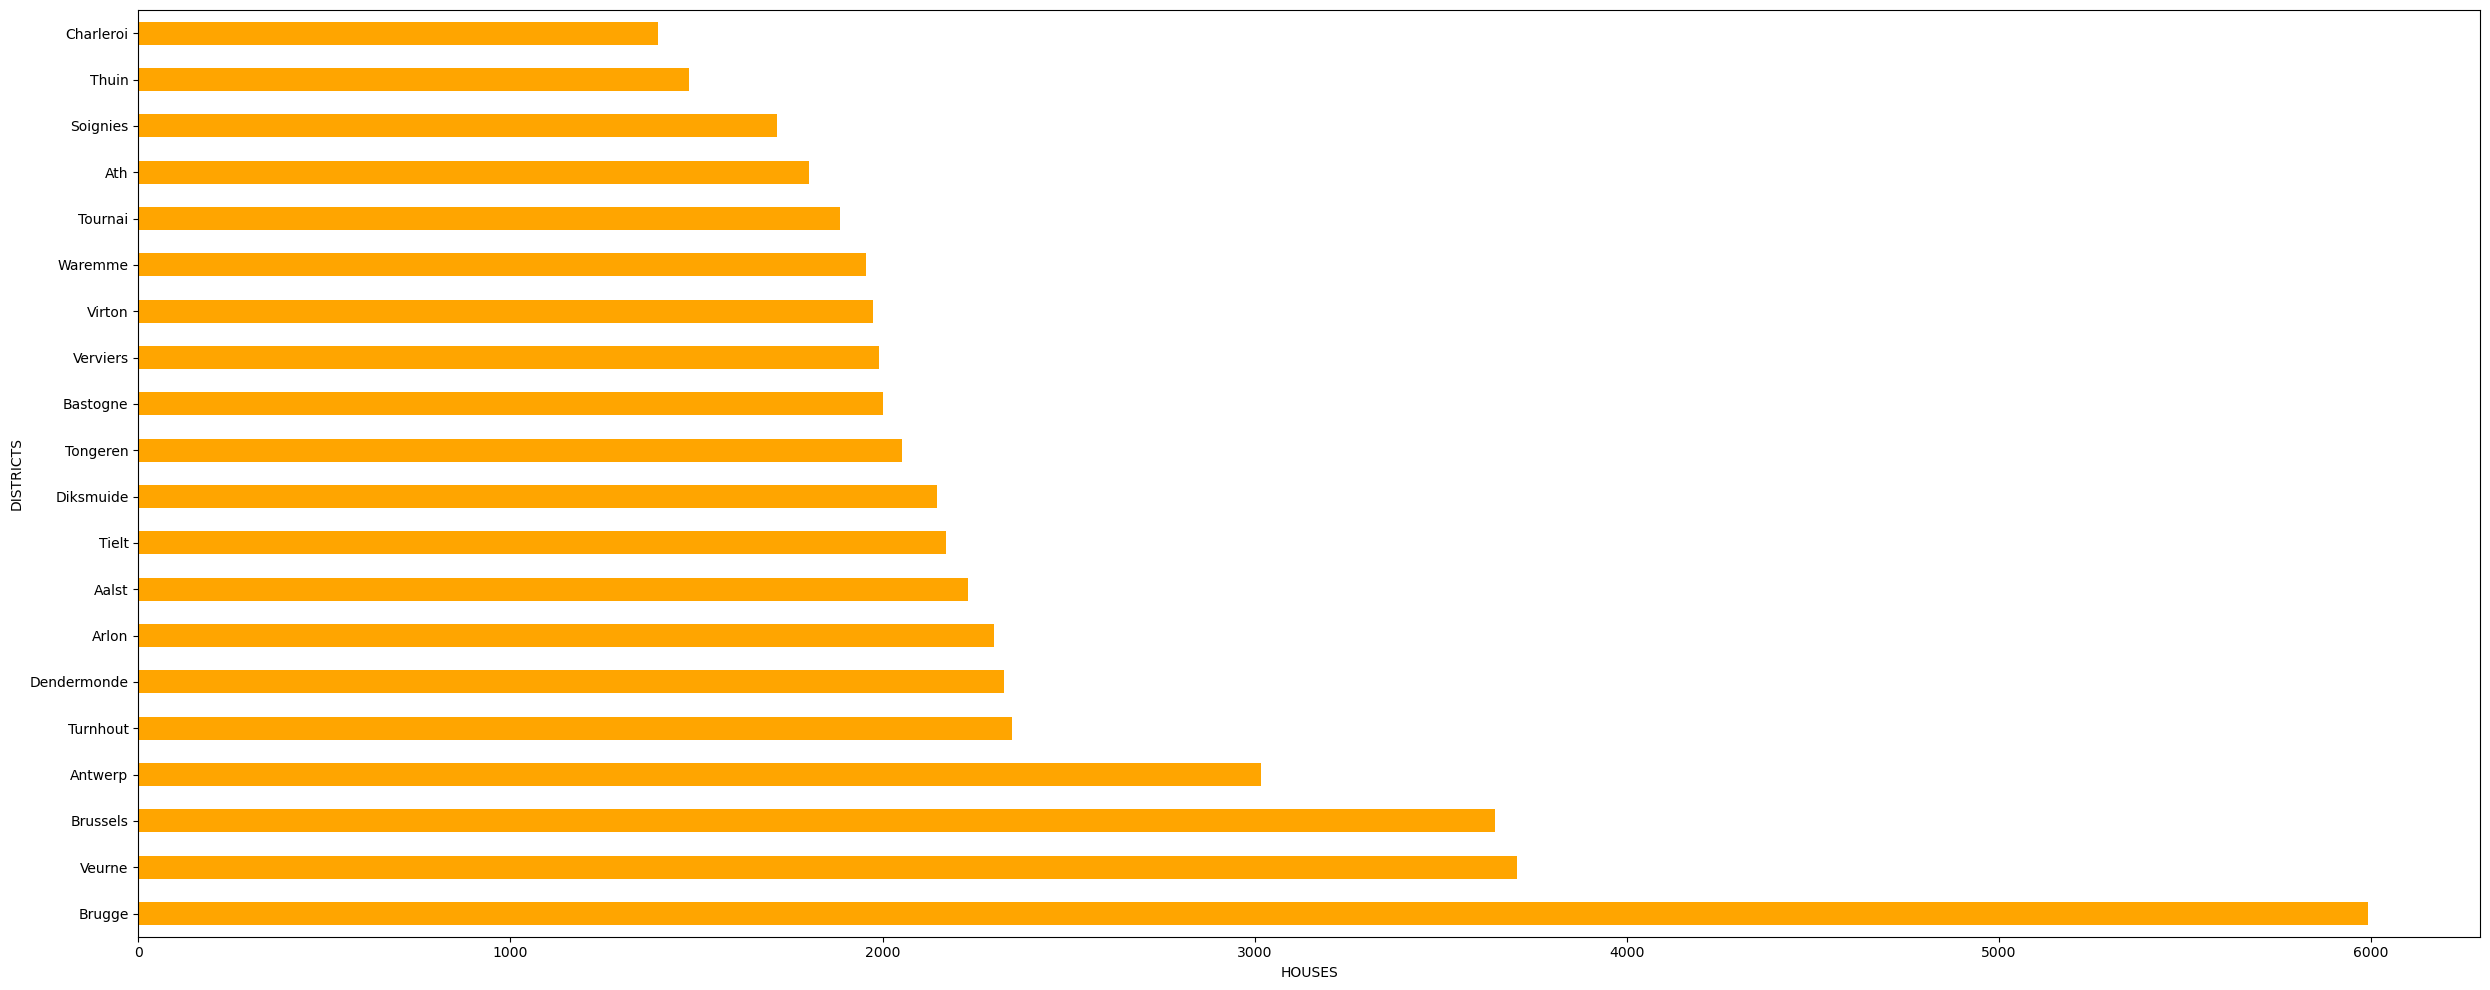

In [99]:
head_10 = pricesqm.head(10)
tail_10 = pricesqm.tail(10)
both=pd.concat([head_10,tail_10])

both=pd.concat([head_10,tail_10]).sort_values(ascending=False)

plt.figure(figsize=(25, 10))  
both.plot(kind='barh', color='orange')
plt.xlabel('HOUSES') 
plt.ylabel('DISTRICTS') 
plt.tight_layout()
plt.show()



In [81]:
fig = px.box(df, x='province', y='price', title='Average Price by Province')
fig.show()


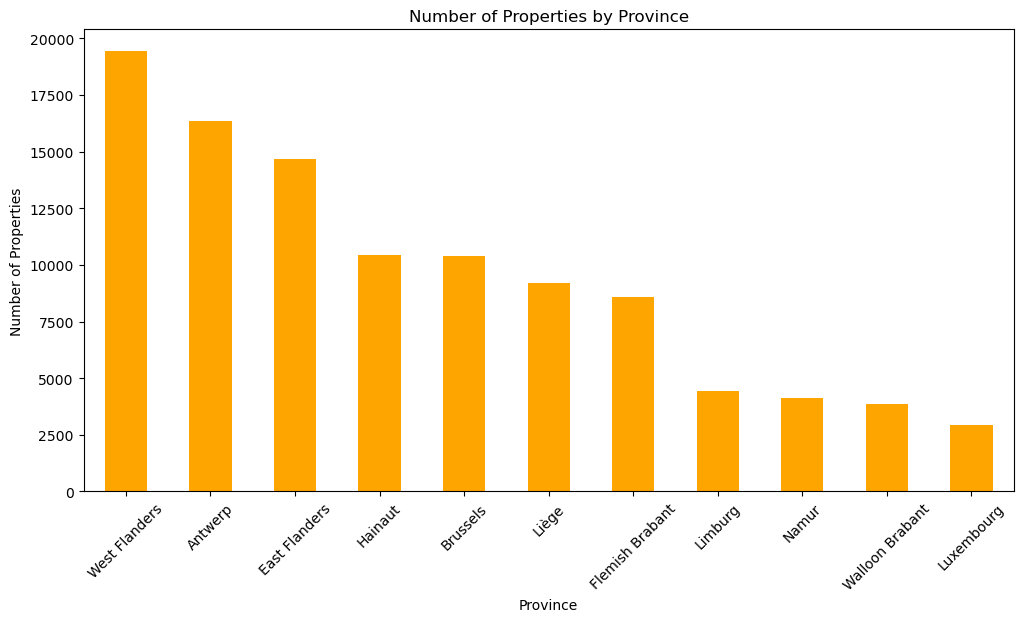

In [82]:
plt.figure(figsize=(12, 6))
df['province'].value_counts().plot(kind='bar', color='orange')
plt.title('Number of Properties by Province')
plt.xlabel('Province')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()


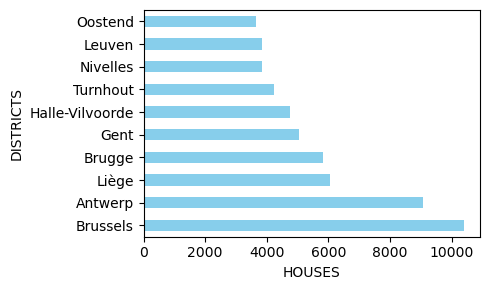

In [83]:
df.groupby('district')['price'].sum().sort_values(ascending=False)

houses_counter_per_district = df.groupby('district').size().sort_values(ascending=False)
houses_counter_per_district = df.groupby('district').size().sort_values(ascending=False).head(10)


plt.figure(figsize=(5, 3))  
houses_counter_per_district.plot(kind='barh', color='skyblue') 
plt.xlabel('HOUSES') 
plt.ylabel('DISTRICTS') 
plt.tight_layout()
plt.show()


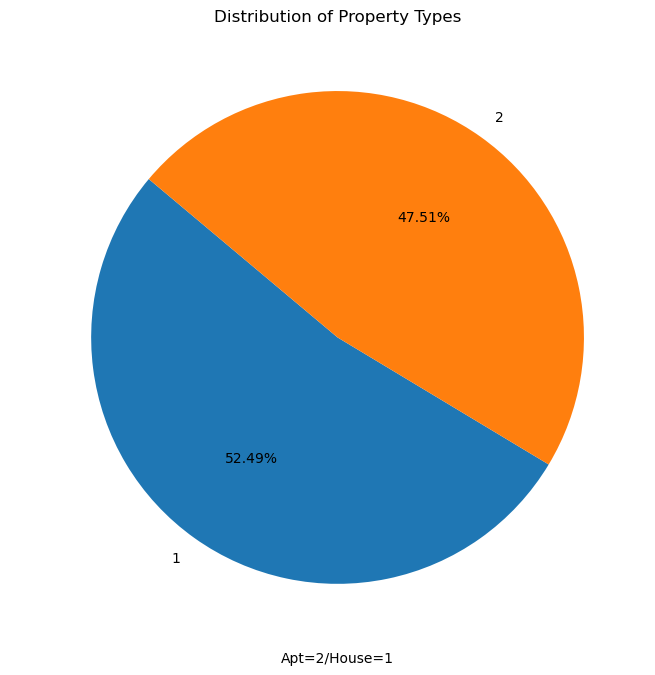

In [84]:
plt.figure(figsize=(8, 8))
df['type_of_property'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=140)
plt.title('Distribution of Property Types')
plt.xlabel('Apt=2/House=1')
plt.ylabel(" ")
plt.show()


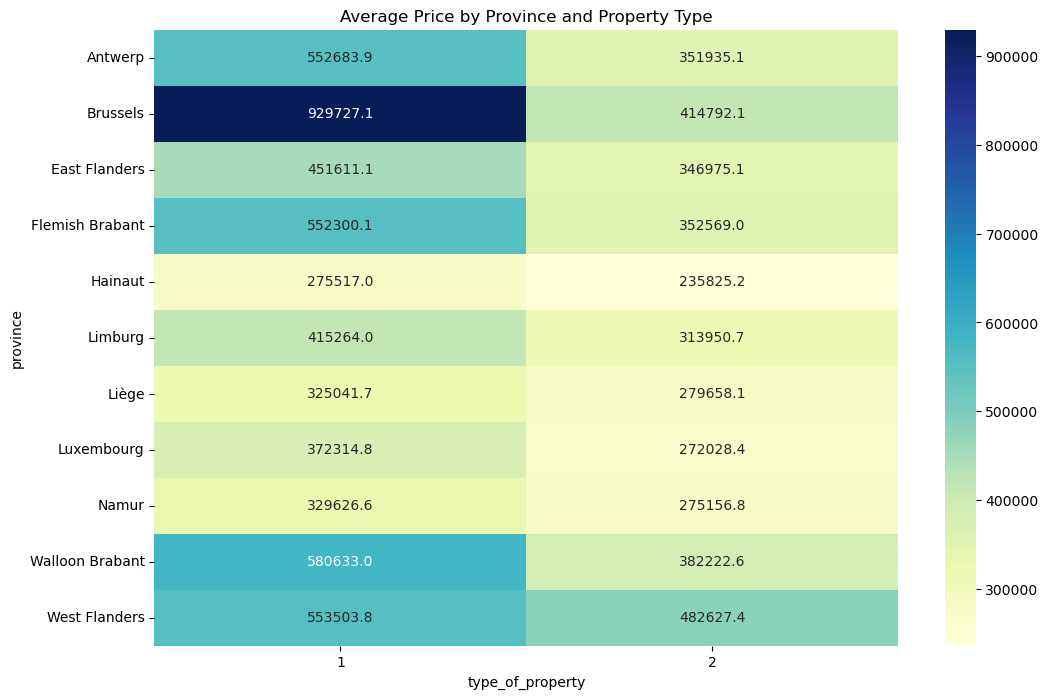

In [85]:
plt.figure(figsize=(12, 8))
pivot_table = df.pivot_table(values='price', index='province', columns='type_of_property', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Price by Province and Property Type')
plt.show()


           province          price  bedroom_count  surface_of_plot
0           Antwerp  447340.839931       2.716882       653.176528
1          Brussels  536695.705882       2.546424       157.731353
2     East Flanders  412620.245062       2.843822       576.798597
3   Flemish Brabant  474254.721640       2.894829       717.349406
4           Hainaut  263511.196566       2.859747       698.077897
5           Limburg  371974.537768       2.744532       966.239008
6             Liège  305887.319835       2.893207       579.041258
7        Luxembourg  335899.897716       3.112854      1555.368565
8             Namur  306083.083837       2.832085      1468.167673
9   Walloon Brabant  506319.440916       3.144977     31092.677512
10    West Flanders  513236.550425       2.565817       385.542342


/var/folders/t9/cltb_c81611c4r7kp6n_lhhr0000gn/T/ipykernel_4743/3198214570.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




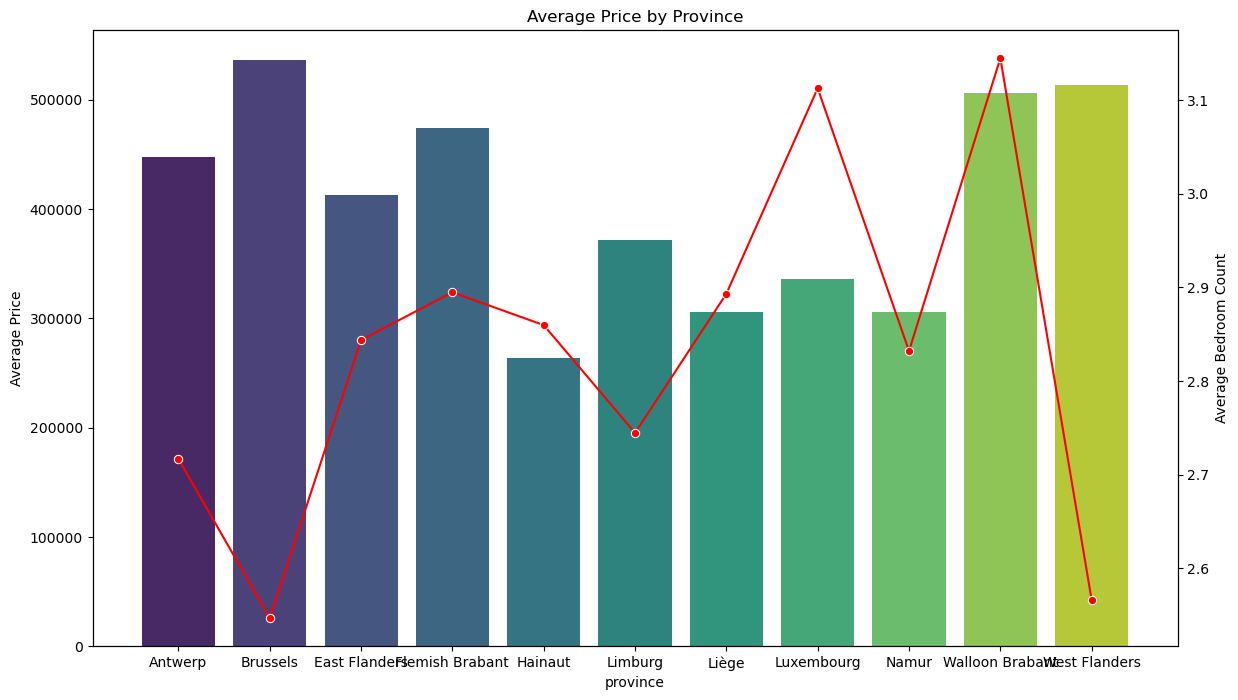

In [86]:
grouped_df = df.groupby('province').agg({
    'price': 'mean',
    'bedroom_count': 'mean',
    'surface_of_plot': 'mean'
}).reset_index()

print(grouped_df)

# Plot
fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(x='province', y='price', data=grouped_df, ax=ax1, palette='viridis')
ax1.set_title('Average Price by Province')
ax1.set_ylabel('Average Price')

ax2 = ax1.twinx()
sns.lineplot(x='province', y='bedroom_count', data=grouped_df, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Bedroom Count')

plt.show()
